In [1]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
#client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8pt5-q6wp", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,10,July 2 - July 7,32.3,28.2,36.6,28.2 - 36.6,31.4-32.9
1996,Symptoms of Anxiety Disorder,By State,Kentucky,Kentucky,10,July 2 - July 7,36.3,31.2,41.6,31.2 - 41.6,35.4-40.6
1997,Symptoms of Anxiety Disorder,By State,Louisiana,Louisiana,10,July 2 - July 7,38.6,34.2,43.1,34.2 - 43.1,35.4-40.6
1998,Symptoms of Anxiety Disorder,By State,Maine,Maine,10,July 2 - July 7,32.8,29,36.7,29.0 - 36.7,31.4-32.9


### Race

In [2]:
race_df = results_df.loc[results_df["group"] == "By Race/Hispanic ethnicity", :]
race_df

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
10,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,Apr 23 - May 5,29.4,26.8,32.1,26.8 - 32.1,NaN
11,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic white, single race",1,Apr 23 - May 5,21.4,20.6,22.1,20.6 - 22.1,NaN
12,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic black, single race",1,Apr 23 - May 5,25.6,23.7,27.5,23.7 - 27.5,NaN
13,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1,Apr 23 - May 5,23.6,20.3,27.1,20.3 - 27.1,NaN
14,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1,Apr 23 - May 5,28.3,24.8,32,24.8 - 32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1970,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,10,July 2 - July 7,37.1,34.8,39.4,34.8 - 39.4,NaN
1971,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic white, single race",10,July 2 - July 7,32.9,32,33.8,32.0 - 33.8,NaN
1972,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic black, single race",10,July 2 - July 7,34,31.9,36.2,31.9 - 36.2,NaN
1973,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",10,July 2 - July 7,29.9,26.4,33.7,26.4 - 33.7,NaN


In [3]:
race_df['value']=race_df['value'].astype(float)
race_mean = race_df.groupby("subgroup").mean()
race_mean

C:\Users\sakis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,value
subgroup,
Hispanic or Latino,35.027586
"Non-Hispanic Asian, single race",25.434483
"Non-Hispanic black, single race",33.500000
"Non-Hispanic white, single race",28.641379
"Non-Hispanic, other races and multiple races",39.172414


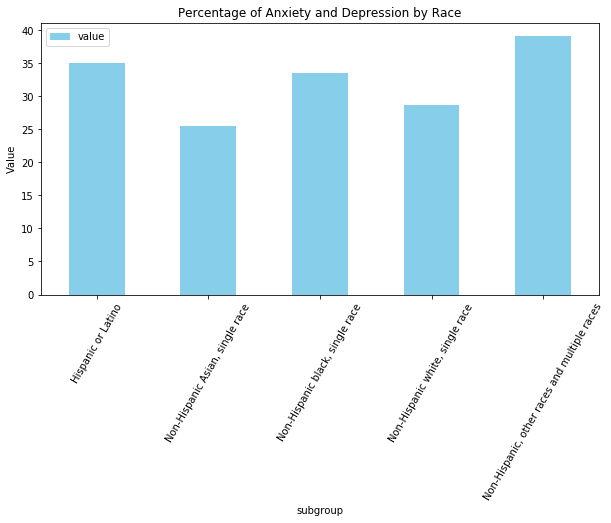

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

# Use DataFrame.plot() in order to create a bar chart of the data
race_mean.plot(kind="bar", color = "skyblue", figsize=(10,5))
plt.xticks(rotation=60)
# Set a title for the chart
plt.title("Percentage of Anxiety and Depression by Race")
plt.ylabel("Value")
plt.show()
plt.tight_layout()

In [5]:
race_df['value']=race_df['value'].astype(float)
race_value = race_df.groupby("subgroup")
race_value.head()

C:\Users\sakis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
10,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,Apr 23 - May 5,29.4,26.8,32.1,26.8 - 32.1,NaN
11,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic white, single race",1,Apr 23 - May 5,21.4,20.6,22.1,20.6 - 22.1,NaN
12,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic black, single race",1,Apr 23 - May 5,25.6,23.7,27.5,23.7 - 27.5,NaN
13,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1,Apr 23 - May 5,23.6,20.3,27.1,20.3 - 27.1,NaN
14,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1,Apr 23 - May 5,28.3,24.8,32,24.8 - 32.0,NaN
80,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,Apr 23 - May 5,36.3,33.4,39.2,33.4 - 39.2,NaN
81,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic white, single race",1,Apr 23 - May 5,29.0,28.2,29.9,28.2 - 29.9,NaN
82,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic black, single race",1,Apr 23 - May 5,32.8,30.3,35.5,30.3 - 35.5,NaN
83,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1,Apr 23 - May 5,26.3,23.6,29.1,23.6 - 29.1,NaN
84,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1,Apr 23 - May 5,38.2,34.3,42.3,34.3 - 42.3,NaN


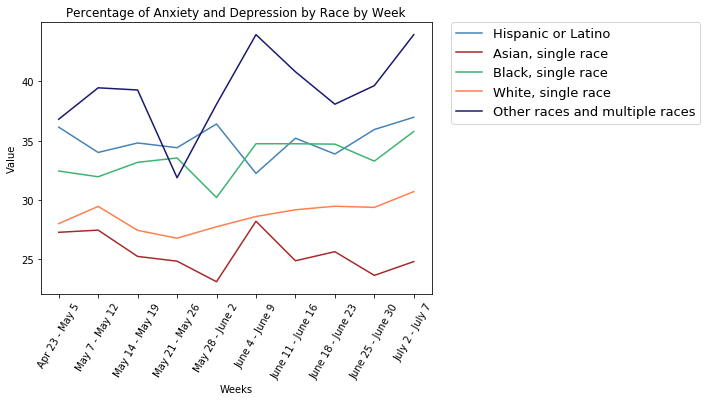

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(7, 5))
plt.xticks(rotation=60)

# Create a list of the weeks that we will use as x axis
weeks = ["Apr 23 - May 5","May 7 - May 12","May 14 - May 19","May 21 - May 26","May 28 - June 2",
         "June 4 - June 9","June 11 - June 16","June 18 - June 23","June 25 - June 30","July 2 - July 7"]

hispanic_latino = race_df.loc[race_df["subgroup"] == "Hispanic or Latino"]
hispanic_latino_week = hispanic_latino.groupby("week").mean()["value"]

asian = race_df.loc[race_df["subgroup"] == "Non-Hispanic Asian, single race"]
asian_week = asian.groupby("week").mean()["value"]

black = race_df.loc[race_df["subgroup"] == "Non-Hispanic black, single race"]
black_week = black.groupby("week").mean()["value"]

white = race_df.loc[race_df["subgroup"] == "Non-Hispanic white, single race"]
white_week = white.groupby("week").mean()["value"]

other = race_df.loc[race_df["subgroup"] == "Non-Hispanic, other races and multiple races"]
other_week = other.groupby("week").mean()["value"]

# Plot the line chart
plt.plot(weeks, hispanic_latino_week, "steelblue", label="Hispanic or Latino")
plt.plot(weeks, asian_week, "brown", label="Asian, single race")
plt.plot(weeks, black_week, "mediumseagreen", label="Black, single race")
plt.plot(weeks, white_week, "coral", label="White, single race")
plt.plot(weeks, other_week, "midnightblue", label="Other races and multiple races")

# Place a legend outside of the chart
#https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=13)

plt.xlabel("Weeks")
plt.ylabel("Value")
plt.title("Percentage of Anxiety and Depression by Race by Week")

# Show the chart
plt.show()